In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
import utilities as rocku
import dxchange
from tqdm import tqdm
import timeit
import multiprocessing as mp
# from joblib import Parallel, delayed

In [2]:
# %matplotlib notebook
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
ncore = mp.cpu_count()
ncore

48

# Workflow starts here!

In [4]:
###################### need to change start
ipts="31601"
###################### need to change end

## Find file location

In [6]:
# ct_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/ct_scans"
# file_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/autoreduce/raw_to_recon"
data_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/rockit"

os.listdir(data_loc)

['2024_01_26_Deut_SF_CT']

In [7]:
folder_name = "2024_01_26_Deut_SF_CT"
data_dir = os.path.join(data_loc, folder_name)
fname_list = sorted(os.listdir(data_dir))

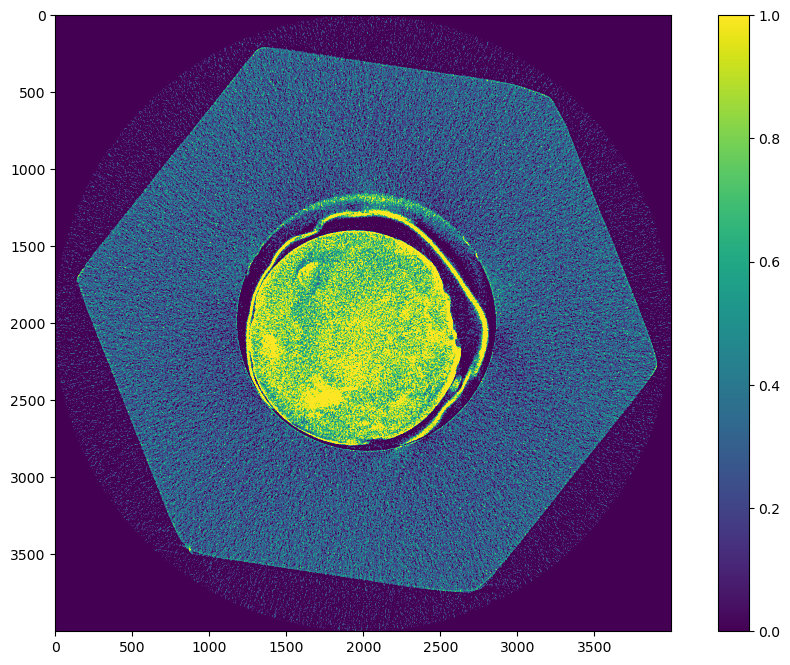

In [9]:
img_idx = 350
img = dxchange.read_tiff(os.path.join(data_dir, fname_list[img_idx]))
plt.imshow(img, vmin=0, vmax=1)
plt.colorbar()
plt.show()

Cropped:


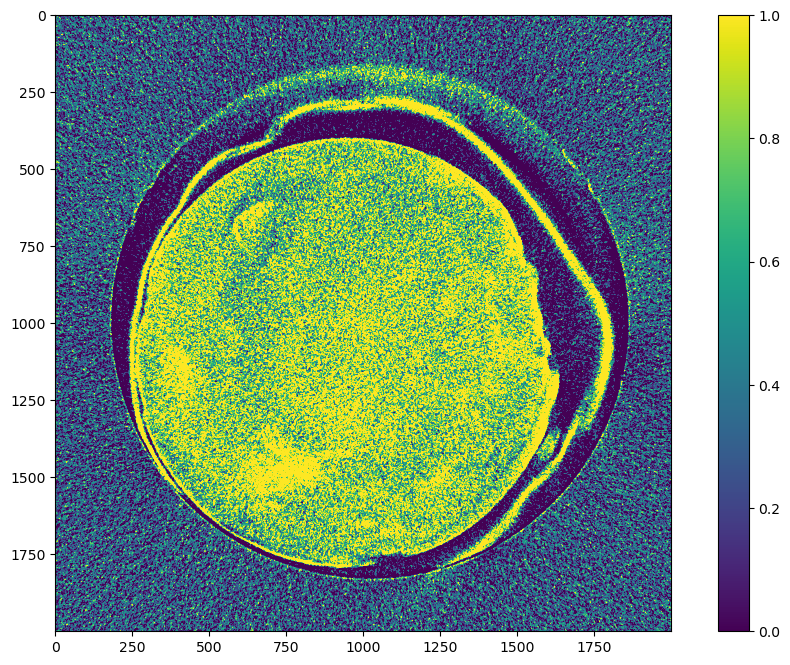

In [10]:
###################### need to change start
# crop_left = 4500
# crop_right = 6000
# crop_top = 800
# crop_bottom = 2800
crop_left = 1000
crop_right = 3000
crop_top = 1000
crop_bottom = 3000
###################### need to change end
crop = True
img = dxchange.read_tiff(os.path.join(data_dir, fname_list[img_idx]))
img_crop = rocku.crop(img, crop_left, crop_right, crop_top, crop_bottom, crop)
print("Cropped:")
plt.imshow(img_crop, vmin=0, vmax=1)
plt.colorbar()
plt.show()

In [11]:
# save_to = "/HFIR/CG1D/IPTS-"+ipts+"/shared/autoreduce/rockit/" + folder_name + "_left"
save_to = data_dir + "_crop"
# save_to = data_dir + "_right"
for efname in fname_list:
    _img = dxchange.read_tiff(os.path.join(data_dir, efname))
    _img_crop = rocku.crop(_img, crop_left, crop_right, crop_top, crop_bottom, crop)
#     _img_crop = -1 * _img_crop
    _save_path = os.path.join(save_to, efname)
    print('Saving {} ...'.format(_save_path))
    dxchange.write_tiff(_img_crop, fname=_save_path, overwrite=True)

Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00000.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00001.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00002.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00003.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00004.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00005.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00006.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00007.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00008.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_

Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00078.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00079.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00080.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00081.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00082.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00083.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00084.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00085.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00086.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_

Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00157.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00158.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00159.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00160.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00161.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00162.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00163.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00164.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00165.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_

Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00235.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00236.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00237.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00238.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00239.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00240.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00241.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00242.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00243.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_

Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00314.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00315.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00316.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00317.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00318.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00319.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00320.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00321.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00322.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_

Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00392.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00393.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00394.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00395.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00396.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00397.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00398.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00399.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00400.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_

Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00470.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00471.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00472.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00473.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00474.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00475.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00476.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00477.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00478.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_

Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00548.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00549.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00550.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00551.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00552.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00553.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00554.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00555.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_data/rockit/2024_01_26_Deut_SF_CT_crop/recon_00556.tiff ...
Saving /HFIR/CG1D/IPTS-31601/shared/processed_